In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, QuantileTransformer, normalize

import lightgbm as lgb
import optuna

from sklearn import metrics

/home/chingisbadmaev/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Gradient decent

In [3]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data[data.Outcome == 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Outcome']), data['Outcome'], test_size=0.2, random_state=1)

In [7]:
y_test.mean()

0.35714285714285715

loss function = cross-entropy

In [8]:
def cross_entropy(y, y_pred):
    return - sum((y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))

In [9]:
def cross_entropy_grad(y, y_pred, x):
    return np.dot((y_pred - y), x)

In [10]:
def predict(x, w):
    z = np.dot(x, w)
    return 1/(1 + np.exp(-z))

In [11]:
minmax_scaler = MinMaxScaler().fit(X_train)
X_train_minmax = minmax_scaler.transform(X_train)

train

In [12]:
w = np.random.rand(X_train_minmax.shape[1])
print('init weight:', w)
alpha = 1e-3
for i in range(10000):
    y_pred = predict(X_train_minmax, w)
    loss = cross_entropy(y_train, y_pred)
    
    if i % 100 == 0:
        print (f'i = {i}, loss = {loss}')    
    w -= alpha * cross_entropy_grad(y_train, y_pred, X_train_minmax)

init weight: [0.69951929 0.22564858 0.77277157 0.28587929 0.43285466 0.77791002
 0.21043203 0.58518908]
i = 0, loss = 665.8138767011376
i = 100, loss = 386.08357589126786
i = 200, loss = 375.63039478099165
i = 300, loss = 370.4865454312763
i = 400, loss = 367.7720420986219
i = 500, loss = 366.2708798433527
i = 600, loss = 365.41048732237994
i = 700, loss = 364.9028205902831
i = 800, loss = 364.5958366785709
i = 900, loss = 364.4061844272422
i = 1000, loss = 364.28673942067974
i = 1100, loss = 364.2101652004143
i = 1200, loss = 364.16025234688544
i = 1300, loss = 364.1272027487357
i = 1400, loss = 364.1049903350501
i = 1500, loss = 364.089849196558
i = 1600, loss = 364.07939007291714
i = 1700, loss = 364.0720749643033
i = 1800, loss = 364.06689979792515
i = 1900, loss = 364.0632000047664
i = 2000, loss = 364.0605297955754
i = 2100, loss = 364.0585862308473
i = 2200, loss = 364.05716086186266
i = 2300, loss = 364.05610854720373
i = 2400, loss = 364.05532709466195
i = 2500, loss = 364.054

predict

In [13]:
X_test_minmax = minmax_scaler.transform(X_test)
y_pred = predict(X_test_minmax, w) > 0.5

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.6428571428571429


#### Logistic regression

In [15]:
# логичтическая регрессия
model_LR = LogisticRegression(max_iter=5000)
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

print('accuracy_score:', metrics.accuracy_score(y_test, y_pred_LR))
print('roc_auc_score:', metrics.roc_auc_score(y_test, y_pred_LR))

accuracy_score: 0.7792207792207793
roc_auc_score: 0.7313131313131312


<AxesSubplot: >

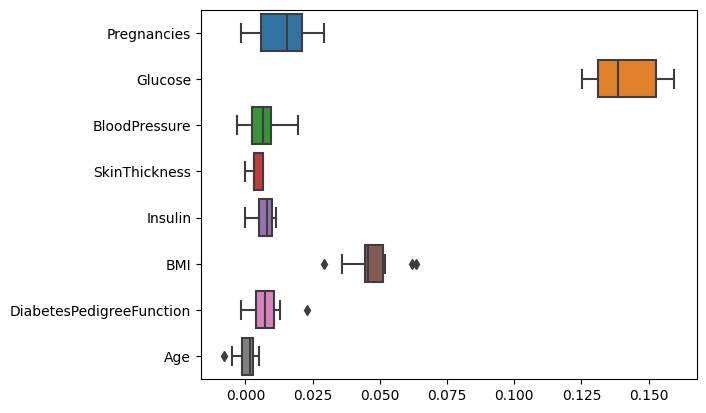

In [16]:
result_LR = permutation_importance(model_LR, X_train, y_train, n_repeats=10,random_state=23)
sns.boxplot(pd.DataFrame(result_LR['importances'].T,columns=X_train.columns),orient='h')

In [17]:
# логичтическая регрессия
model_LR = LogisticRegression(max_iter=5000)
model_LR.fit(X_train.drop(columns=['Age']), y_train)
y_pred_LR = model_LR.predict(X_test.drop(columns=['Age']))

print('accuracy_score:', metrics.accuracy_score(y_test, y_pred_LR))
print('roc_auc_score:', metrics.roc_auc_score(y_test, y_pred_LR))

accuracy_score: 0.7792207792207793
roc_auc_score: 0.7313131313131312


#### lightgbm

In [18]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)

print('accuracy_score:', metrics.accuracy_score(y_test, y_pred_lgb))
print('roc_auc_score:', metrics.roc_auc_score(y_test, y_pred_lgb))
print('classification_report:', '\n', metrics.classification_report(y_test, y_pred_lgb))

accuracy_score: 0.7857142857142857
roc_auc_score: 0.7565656565656566
classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



<AxesSubplot: >

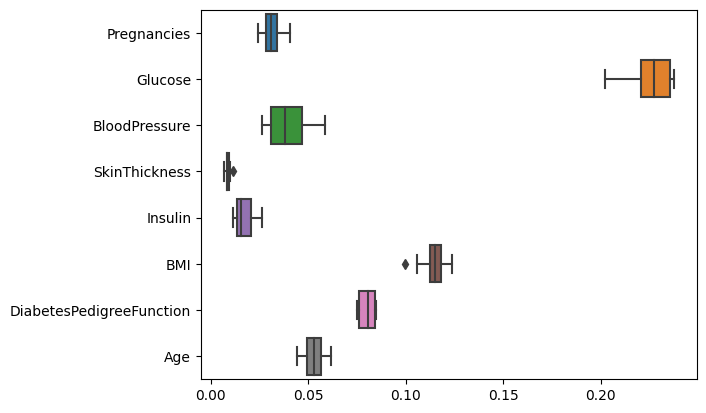

In [19]:
result_lgb = permutation_importance(model_lgb, X_train, y_train, n_repeats=10,random_state=23)
sns.boxplot(pd.DataFrame(result_lgb['importances'].T,columns=X_train.columns),orient='h')
